<img src="enunciados/Captura de tela 2025-08-14 010358.png">

In [55]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

alpha = sp.Symbol("alpha")
beta = sp.Symbol("beta")
H = sp.zeros(5)

H[0,0] = alpha
H[1,1] = alpha
H[2,2] = alpha
H[3,3] = alpha
H[4,4] = alpha

H[0,1] = beta
H[1,0] = beta
H[1,2] = beta
H[2,1] = beta
H[2,3] = beta
H[3,2] = beta
H[3,4] = beta
H[4,3] = beta
H[0,4] = beta
H[4,0] = beta

H



Matrix([
[alpha,  beta,     0,     0,  beta],
[ beta, alpha,  beta,     0,     0],
[    0,  beta, alpha,  beta,     0],
[    0,     0,  beta, alpha,  beta],
[ beta,     0,     0,  beta, alpha]])

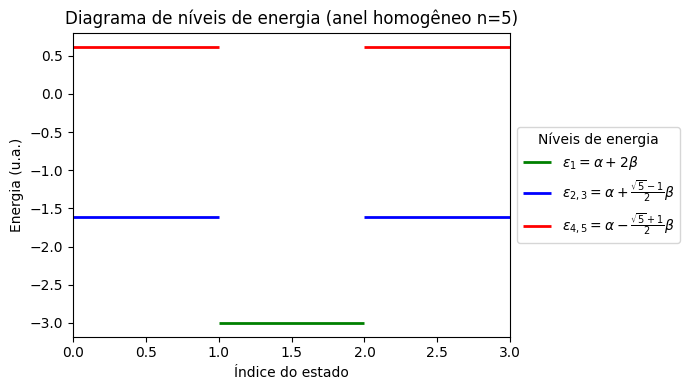


Determinante secular |H - E I| = 0 (forma polinomial, coeficientes racionais):
                  3                  
   5      4   17⋅E       2   17⋅E    
- E  - 2⋅E  + ───── + 6⋅E  - ──── - 4
                4             4      

Forma fatorada (se houver):
 ⎛   5      4       3       2            ⎞ 
-⎝4⋅E  + 8⋅E  - 17⋅E  - 24⋅E  + 17⋅E + 16⎠ 
───────────────────────────────────────────
                     4                     


<IPython.core.display.Math object>


Energias e ocupações (Oxazol, Hückel+QR):


,MO,Energia (β units),Ocupação
0,ψ1,-2.590952,2
1,ψ2,-1.359578,2
2,ψ3,-0.671037,2
3,ψ4,1.149664,0
4,ψ5,1.471903,0



Coeficientes dos MOs (base: O1,C2,N3,C4,C5):


,ψ1,ψ2,ψ3,ψ4,ψ5
O(1),0.718044,-0.532070,-0.083925,0.433169,0.081454
C(2),0.401366,0.115357,-0.542763,-0.678681,0.265326
N(3),0.321876,0.688907,-0.280289,0.347086,-0.471988
C(4),0.271661,0.476812,0.494823,0.106106,0.665388
C(5),0.381985,-0.040643,0.612334,-0.469072,-0.507399



Populações π (atômicas):


,Átomo,π-população
0,O(1),1.611459
1,C(2),0.937988
2,N(3),1.313518
3,C(4),1.092000
4,C(5),1.045035



Ordens de ligação π:


,Ligação,π-ordem
0,O1–C2,0.544744
1,C2–N3,0.721582
2,N3–C4,0.554454
3,C4–C5,0.774777
4,C5–O1,0.489035


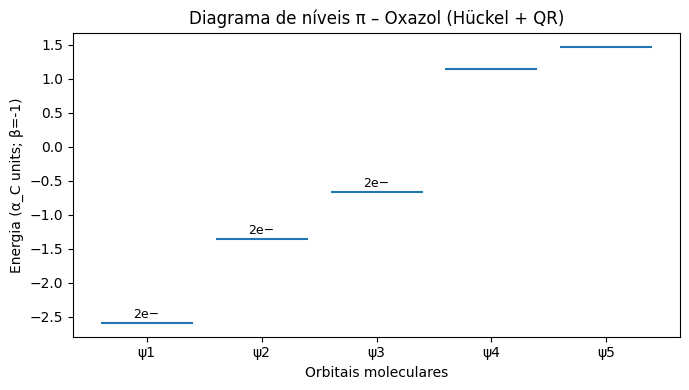

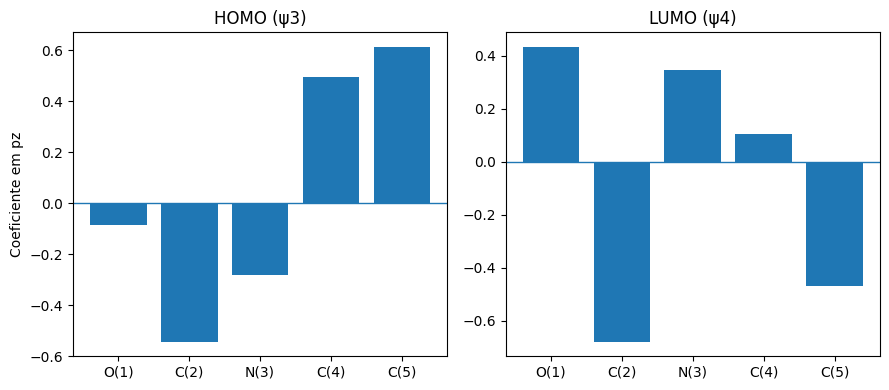

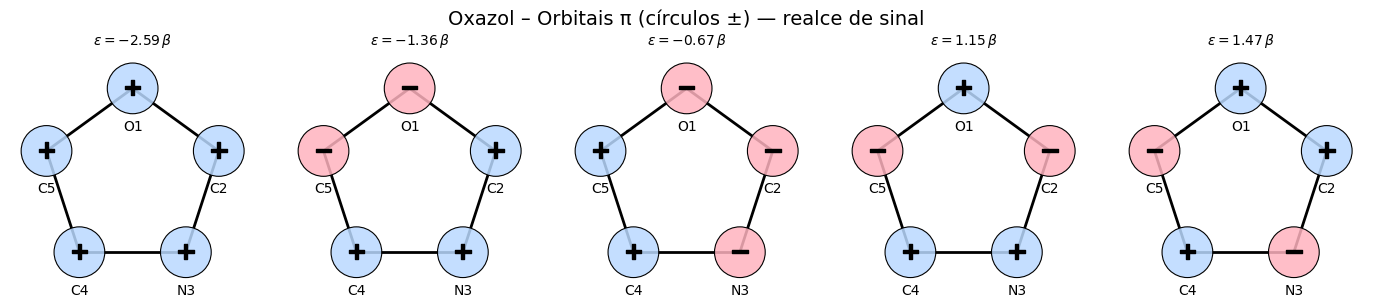

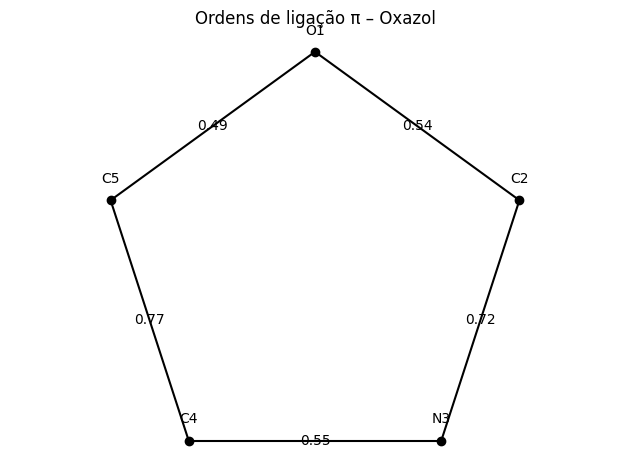

In [67]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.patches import Circle
from IPython.display import display

# (anel n=5 homogêneo) — mantido para referência/validação
alpha = sp.Symbol("alpha")
beta  = sp.Symbol("beta")
H = sp.zeros(5)

H[0,0] = alpha
H[1,1] = alpha
H[2,2] = alpha
H[3,3] = alpha
H[4,4] = alpha

H[0,1] = beta; H[1,0] = beta
H[1,2] = beta; H[2,1] = beta
H[2,3] = beta; H[3,2] = beta
H[3,4] = beta; H[4,3] = beta
H[0,4] = beta; H[4,0] = beta

# Autovalores simbólicos (opcional)
_ = H.eigenvects(simplify=True)

# Valores numéricos para plot (anel homogêneo)
alpha_num = -1.0
beta_num  = -1.0
s5 = np.sqrt(5.0)
e1  = alpha_num + 2*beta_num
e23 = alpha_num + ((s5 - 1)/2.0)*beta_num
e45 = alpha_num - ((s5 + 1)/2.0)*beta_num


# Diagrama de níveis --- (cores iguais ao exemplo)
plt.figure(figsize=(7,4))
plt.title("Diagrama de níveis de energia (anel homogêneo n=5)")

# nível mais baixo (ocupado) em verde
plt.hlines(e1, 1, 2, colors='green', linewidth=2, label=r'$\varepsilon_1 = \alpha + 2\beta$')

# par degenerado k=±1 (ocupado) também em azul
plt.hlines(e23, 0, 1, colors='blue', linewidth=2, label=r'$\varepsilon_{2,3} = \alpha + \frac{\sqrt{5}-1}{2}\beta$')
plt.hlines(e23, 2, 3, colors='blue', linewidth=2)

# par degenerado k=±2 (desocupado) em vermelho
plt.hlines(e45, 0, 1, colors='red', linewidth=2, label=r'$\varepsilon_{4,5} = \alpha - \frac{\sqrt{5}+1}{2}\beta$')
plt.hlines(e45, 2, 3, colors='red', linewidth=2)

plt.xlim(0, 3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, title="Níveis de energia")
plt.xlabel("Índice do estado")
plt.ylabel("Energia (u.a.)")
plt.tight_layout()
plt.show()

# PARTE OXAZOL — Hückel (pz) + QR (sem funções), numeração: 1=O, 2=C, 3=N, 4=C, 5=C (sentido horário)
labels = ["O(1)", "C(2)", "N(3)", "C(4)", "C(5)"]

# Parâmetros de Hückel (unidades de β; convencionais simples tipo Streitwieser)
beta = -1.0
alpha_C = 0.0        # tomamos α_C como referência
alpha_O = alpha_C + 1.5*beta
alpha_N = alpha_C + 0.5*beta

# Matriz de Hückel do oxazol (apenas pz; vizinhos mais próximos)
H_ox = np.array([[alpha_O, beta,     0.0,  0.0,  beta],
                 [beta,    alpha_C,  beta, 0.0,  0.0 ],
                 [0.0,     beta,     alpha_N, beta, 0.0],
                 [0.0,     0.0,      beta, alpha_C, beta],
                 [beta,    0.0,      0.0,  beta, alpha_C]], dtype=float)

# Determinante secular (bonito) ---
from IPython.display import display, Math

E = sp.Symbol('E')
H_sym = sp.Matrix(H_ox.tolist())

# det(H - E I)
secular = (H_sym - E*sp.eye(5)).det()

# Limpar/fixar forma
secular_simpl   = sp.simplify(secular)
secular_exp     = sp.expand(secular_simpl)
secular_rat     = sp.nsimplify(secular_exp, rational=True)  # coeficientes racionais
secular_fact    = sp.factor(secular_rat)

print("\nDeterminante secular |H - E I| = 0 (forma polinomial, coeficientes racionais):")
sp.pretty_print(secular_rat)

print("\nForma fatorada (se houver):")
sp.pretty_print(secular_fact)

# Versão em LaTeX (se estiver no Jupyter, aparece renderizada)
try:
    display(Math(r"\det(\mathbf{H}-E\mathbf{I}) = " + sp.latex(secular_rat)))
except Exception:
    pass


# Diagonalização por QR com deslocamento de Wilkinson (sem funções) ---
A = H_ox.copy()
n = 5
Q_total = np.eye(n)
for _ in range(10000):
    off = np.sqrt(np.sum(np.tril(A,-1)**2 + np.triu(A,1)**2))
    if off < 1e-12:
        break
    d = (A[n-2,n-2] - A[n-1,n-1]) / 2.0
    sign = 1.0 if d >= 0 else -1.0
    mu = A[n-1,n-1] - sign * (A[n-1,n-2]**2) / (abs(d) + np.sqrt(d*d + A[n-1,n-2]**2))
    Q, R = np.linalg.qr(A - mu*np.eye(n))
    A = R @ Q + mu*np.eye(n)
    Q_total = Q_total @ Q

eigvals = np.diag(A)
order = np.argsort(eigvals)
eigvals = eigvals[order]
eigvecs = Q_total[:, order]
for j in range(n):
    eigvecs[:,j] /= np.linalg.norm(eigvecs[:,j])

# Preenchimento eletrônico (6 π elétrons → 3 MOs ocupados)
n_elec = 6
n_occ  = n_elec // 2

# Tabelas
energies = pd.DataFrame({
    "MO": [f"ψ{i+1}" for i in range(5)],
    "Energia (β units)": eigvals,
    "Ocupação": ["2" if i < n_occ else "0" for i in range(5)]
})
coeffs = pd.DataFrame(eigvecs, index=labels, columns=[f"ψ{i+1}" for i in range(5)])

print("\nEnergias e ocupações (Oxazol, Hückel+QR):")
display(energies.round(6))
print("\nCoeficientes dos MOs (base: O1,C2,N3,C4,C5):")
display(coeffs.round(6))

# Populações π e ordens de ligação π
pop = 2.0 * np.sum(eigvecs[:, :n_occ]**2, axis=1)
pairs = [(0,1), (1,2), (2,3), (3,4), (4,0)]
pair_labels = ["O1–C2", "C2–N3", "N3–C4", "C4–C5", "C5–O1"]

bond_orders = []
for (i,j), lab in zip(pairs, pair_labels):
    Pij = 2.0 * np.sum(eigvecs[i, :n_occ] * eigvecs[j, :n_occ])
    bond_orders.append((lab, Pij))

print("\nPopulações π (atômicas):")
display(pd.DataFrame({"Átomo": labels, "π-população": pop}).round(6))
print("\nOrdens de ligação π:")
display(pd.DataFrame(bond_orders, columns=["Ligação","π-ordem"]).round(6))

# Diagrama de níveis do oxazol + ocupação
plt.figure(figsize=(7,4))
x = np.arange(1,6)
for i in range(5):
    y = eigvals[i]
    plt.hlines(y, x[i]-0.4, x[i]+0.4)
    if i < n_occ:
        plt.text(x[i], y+0.03, "2e−", ha='center', va='bottom', fontsize=9)
plt.xticks(x, [f"ψ{i}" for i in range(1,6)])
plt.xlabel("Orbitais moleculares")
plt.ylabel("Energia (α_C units; β=-1)")
plt.title("Diagrama de níveis π – Oxazol (Hückel + QR)")
plt.tight_layout()
plt.show()

# Esboços HOMO/LUMO como barras de coeficientes (sinal e magnitude)
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.bar(np.arange(5), eigvecs[:,2], tick_label=labels)
plt.axhline(0, linewidth=1)
plt.title("HOMO (ψ3)"); plt.ylabel("Coeficiente em pz")
plt.subplot(1,2,2)
plt.bar(np.arange(5), eigvecs[:,3], tick_label=labels)
plt.axhline(0, linewidth=1)
plt.title("LUMO (ψ4)")
plt.tight_layout()
plt.show()

#  “Círculos +/−” (estilo do exemplo) para os 5 MOs
theta = np.deg2rad(np.array([90, 18, -54, -126, 162]))
R = 1.0
xy = np.c_[R*np.cos(theta), R*np.sin(theta)]

fig, axes = plt.subplots(1,5, figsize=(14,3))
simple_labels = ["O1","C2","N3","C4","C5"]
for k, ax in enumerate(axes):
    # ligações do anel
    for i in range(5):
        j = (i+1)%5
        ax.plot([xy[i,0], xy[j,0]], [xy[i,1], xy[j,1]], lw=2, color="black")
    # círculos de fase fixos
    for i,(x0,y0) in enumerate(xy):
        sgn = 1 if eigvecs[i,k] >= 0 else -1
        color = (0.73,0.85,1.0,0.85) if sgn>0 else (1.0,0.7,0.75,0.85)
        circ = Circle((x0,y0), radius=0.28, facecolor=color,
                      edgecolor='black', linewidth=0.8, zorder=2)
        ax.add_patch(circ)
        # Símbolo ± grande, negrito, com contorno branco para contraste
        t = ax.text(x0, y0, '+' if sgn>0 else '−',
                    ha='center', va='center', fontsize=18,
                    fontweight='bold', color='black', zorder=3)
        t.set_path_effects([pe.withStroke(linewidth=1)])
        # Rótulo do átomo um pouco abaixo
        ax.text(x0, y0-0.34, simple_labels[i], ha='center',
                va='top', fontsize=10, zorder=3)
    ax.set_aspect('equal'); ax.axis('off')
    ax.set_title(rf"$\varepsilon = {eigvals[k]:.2f}\,\beta$", fontsize=10)

fig.suptitle("Oxazol – Orbitais π (círculos ±) — realce de sinal", fontsize=14)
plt.tight_layout()
plt.show()

# Mapa do anel com ordens de ligação sobre cada ligação
plt.figure()
for i in range(5):
    j = (i+1)%5
    plt.plot([xy[i,0], xy[j,0]], [xy[i,1], xy[j,1]], color="black")
for (i,j),(lab, Pij) in zip(pairs, bond_orders):
    xm, ym = (xy[i]+xy[j])/2
    plt.text(xm, ym, f"{Pij:.2f}", ha='center', va='center')
for i,(x0,y0) in enumerate(xy):
    plt.scatter(x0,y0, color="black"); plt.text(x0, y0+0.08, simple_labels[i], ha='center')
plt.axis('equal'); plt.axis('off')
plt.title("Ordens de ligação π – Oxazol")
plt.tight_layout()
plt.show()


<img src="enunciados/Captura de tela 2025-08-15 212506.png">

<img src="enunciados/Captura de tela 2025-08-15 212549.png">

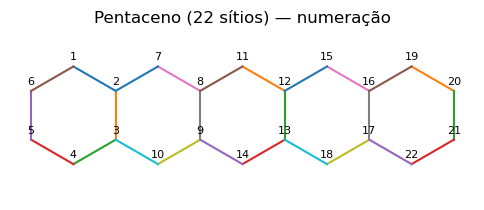

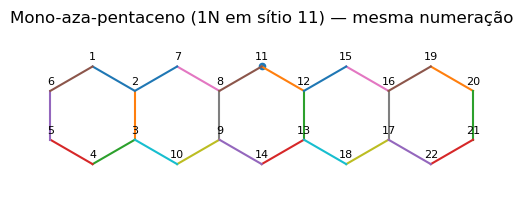

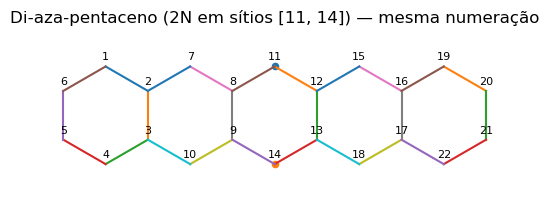

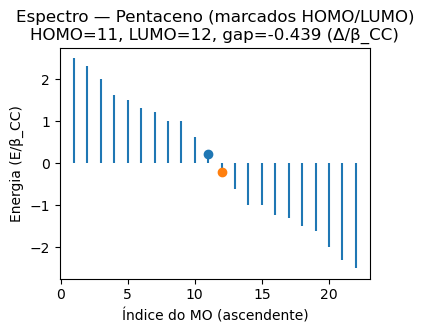

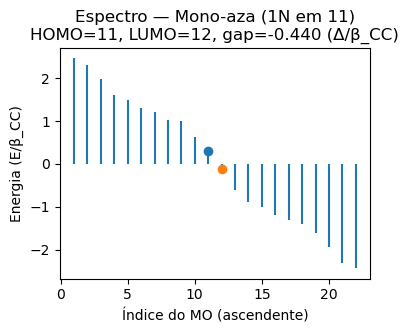

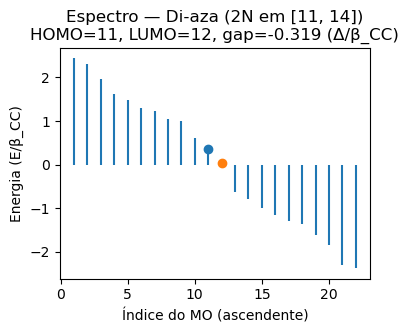

=== Autovalores (E/β_CC) — Pentaceno (topo) ===
 μ  Eμ/β_CC  nμ
 1 2.495508   2
 2 2.302776   2
 3 2.000000   2
 4 1.618034   2
 5 1.495508   2
 6 1.302776   2
 7 1.219687   2
 8 1.000000   2
 9 1.000000   2
10 0.618034   2

=== Populações eletrônicas qi — primeiras linhas ===
 site  qi (0N)  qi (1N@11)  qi (2N@[11, 14])
    1      1.0    1.010512          0.999199
    2      1.0    0.977549          0.984632
    3      1.0    1.005798          0.984632
    4      1.0    0.985577          0.999199
    5      1.0    1.006844          0.992137
    6      1.0    0.983276          0.992137
    7      1.0    1.047582          0.998337
    8      1.0    0.942151          0.942890
    9      1.0    1.003393          0.942890
   10      1.0    0.936731          0.998337

=== Ordens de ligação π — ligações próximas ao sítio 1N ===
ligação (i-j)  pij (0N)  pij (1N)  pij (2N)
         8-11  0.595979  0.521625   0.55337
        11-12  0.595979  0.521625   0.55337

=== Ordens de ligação π — ligaçõe

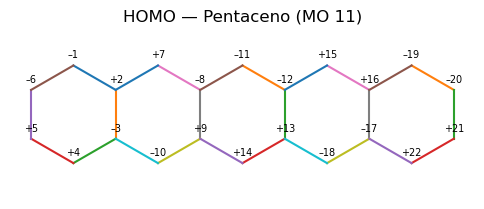

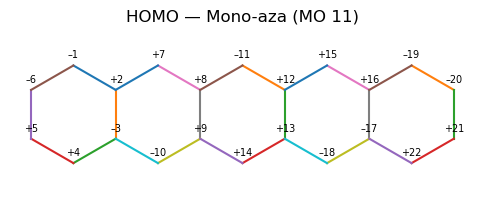

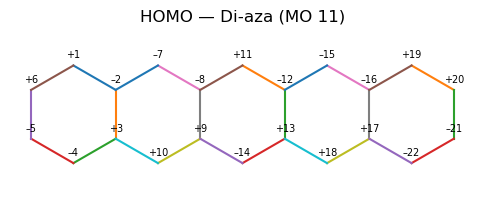

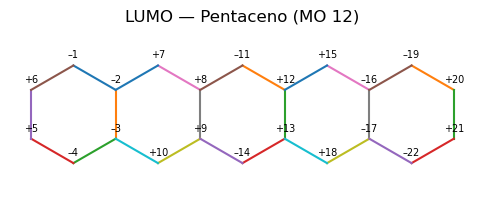

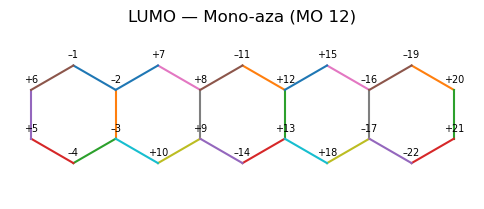

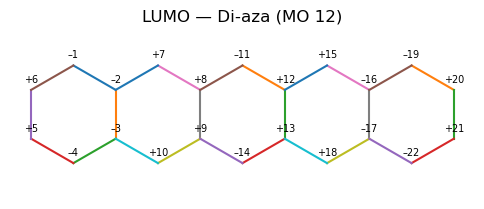


=== Resumo ===
Sítios 1N: [11]  | Sítios 2N: [11, 14]
Gaps (Δ/β_CC): 0N=-0.439, 1N=-0.440, 2N=-0.319

Arquivos gerados em: /mnt/data/huckel_pentaceno


In [18]:
# -*- coding: utf-8 -*-
"""
Hückel π — Pentaceno e aza-derivados (1N e 2N)
Versão em português com nomes claros para variáveis, funções e classes.
Gera os MESMOS arquivos/figuras do script anterior simplificado.
"""

import os
import json
import math
from dataclasses import dataclass
from typing import List, Dict, Tuple, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------
# Parâmetros do modelo de Hückel
# --------------------------------
alfa_C = 0.0
beta_CC = -1.0

alfa_N = alfa_C + 0.5 * beta_CC
beta_CN = 0.80 * beta_CC

variante_aza = "2N"  # apenas referência

# --------------------------------
# Geometria: cadeia linear de 5 anéis (pentaceno)
# --------------------------------
def construir_poliaceno(qtd_hexagonos: int = 5, lado: float = 1.0, atol: float = 1e-6):
    """
    Constrói o grafo do poliaceno linear com 'qtd_hexagonos' anéis fundidos.
    Retorna: posicoes, arestas, vizinhos, centros
      - posicoes: {índice->(x,y)} com índices iniciando em 1
      - arestas:  lista de pares (i,j) com i<j
      - vizinhos: {índice->lista ordenada de vizinhos}
      - centros:  lista de (x,y) dos centros dos hexágonos
    """
    s = lado
    vertices_relativos = np.array([
        (0.0,  1.0 * s),
        (math.sqrt(3)/2 * s,  0.5 * s),
        (math.sqrt(3)/2 * s, -0.5 * s),
        (0.0, -1.0 * s),
        (-math.sqrt(3)/2 * s, -0.5 * s),
        (-math.sqrt(3)/2 * s,  0.5 * s),
    ], dtype=float)
    arestas_hex = [(k, (k+1) % 6) for k in range(6)]

    posicoes: Dict[int, Tuple[float, float]] = {}
    arestas: List[Tuple[int, int]] = []
    proximo_indice = 1
    centros: List[Tuple[float, float]] = []

    def encontrar_no_existente(xy: Tuple[float, float]) -> Optional[int]:
        for idx, (x0, y0) in posicoes.items():
            if abs(x0 - xy[0]) < atol and abs(y0 - xy[1]) < atol:
                return idx
        return None

    for k in range(qtd_hexagonos):
        cx = k * math.sqrt(3) * s
        cy = 0.0
        centros.append((cx, cy))
        vertices = vertices_relativos + np.array([cx, cy])

        indices_locais = []
        for vx, vy in vertices:
            existente = encontrar_no_existente((vx, vy))
            if existente is None:
                posicoes[proximo_indice] = (float(vx), float(vy))
                indices_locais.append(proximo_indice)
                proximo_indice += 1
            else:
                indices_locais.append(existente)

        for a, b in arestas_hex:
            i, j = indices_locais[a], indices_locais[b]
            if i != j:
                ii, jj = (i, j) if i < j else (j, i)
                if (ii, jj) not in arestas:
                    arestas.append((ii, jj))

    esperado = 4 * qtd_hexagonos + 2
    assert len(posicoes) == esperado, f"Obtidos {len(posicoes)} vértices; esperado {esperado}."

    vizinhos: Dict[int, List[int]] = {i: [] for i in posicoes.keys()}
    for i, j in arestas:
        vizinhos[i].append(j)
        vizinhos[j].append(i)
    for i in vizinhos:
        vizinhos[i] = sorted(set(vizinhos[i]))

    return posicoes, arestas, vizinhos, centros


posicoes, arestas, vizinhos, centros = construir_poliaceno(qtd_hexagonos=5)
N = len(posicoes)
assert N == 22
ordem_sitios = sorted(posicoes.keys())

# --------------------------------
# Escolha dos sítios de substituição (N)
# --------------------------------
def escolher_sitios_aza(posicoes, centros, tipo: str = "1N") -> List[int]:
    """
    Seleciona sítios no anel central:
      - "1N": vértice do topo
      - "2N": topo e base
      - "4N": topo, base e dois vizinhos (um do lado superior, outro do inferior)
    """
    k_central = len(centros) // 2
    cx, cy = centros[k_central]
    alvo_topo = (cx, cy + 1.0)
    alvo_base = (cx, cy - 1.0)

    def indice_mais_proximo(xy_alvo):
        tx, ty = xy_alvo
        melhor, melhor_d2 = None, float("inf")
        for idx, (x, y) in posicoes.items():
            d2 = (x - tx) ** 2 + (y - ty) ** 2
            if d2 < melhor_d2:
                melhor, melhor_d2 = idx, d2
        return melhor

    idx_topo = indice_mais_proximo(alvo_topo)
    idx_base = indice_mais_proximo(alvo_base)

    if tipo == "1N":
        return [idx_topo]
    if tipo == "2N":
        return [idx_topo, idx_base]
    if tipo == "4N":
        escolhidos = {idx_topo, idx_base}
        adicionais = []
        for idx in (idx_topo, idx_base):
            for nb in vizinhos[idx]:
                if nb in escolhidos:
                    continue
                # um vizinho acima do topo e um abaixo da base
                cond = (posicoes[nb][1] > 0 if idx == idx_topo else posicoes[nb][1] < 0)
                if cond:
                    adicionais.append(nb)
                if len(adicionais) == 2:
                    break
        return [idx_topo, idx_base] + adicionais[:2]

    raise ValueError("tipo deve ser '1N', '2N' ou '4N'")

sitios_1N = escolher_sitios_aza(posicoes, centros, "1N")
sitios_2N = escolher_sitios_aza(posicoes, centros, "2N")

# --------------------------------
# Hamiltoniano de Hückel
# --------------------------------
def montar_hamiltoniano_huckel(
    N: int,
    vizinhos: Dict[int, List[int]],
    sitios_N: List[int],
    alfa_C: float,
    alfa_N: float,
    beta_CC: float,
    beta_CN: float,
):
    H = np.zeros((N, N), dtype=float)

    eh_N = np.zeros(N, dtype=bool)
    for idx in sitios_N:
        eh_N[idx - 1] = True

    # diagonal (energias α)
    H[np.arange(N), np.arange(N)] = np.where(eh_N, alfa_N, alfa_C)

    # fora da diagonal (ligações β)
    for i in range(N):
        for j in vizinhos[i + 1]:
            j0 = j - 1
            if j0 <= i:
                continue
            beta = beta_CN if (eh_N[i] ^ eh_N[j0]) else beta_CC
            H[i, j0] = H[j0, i] = beta

    return H, eh_N


@dataclass
class ResultadoHuckel:
    H: np.ndarray
    autovalores: np.ndarray
    autovetores: np.ndarray
    indice_homo: int
    indice_lumo: int
    gap: float
    ocupacoes: np.ndarray
    populacoes_q: np.ndarray
    ordens_ligacao: Dict[Tuple[int, int], float]


def resolver_huckel(N, vizinhos, sitios_N, alfa_C, alfa_N, beta_CC, beta_CN) -> ResultadoHuckel:
    """
    Diagonaliza H; calcula ocupações (2 e− por MO cheio), populações π por sítio (q_i),
    e ordens de ligação π (p_ij).
    """
    H, eh_N = montar_hamiltoniano_huckel(N, vizinhos, sitios_N, alfa_C, alfa_N, beta_CC, beta_CN)
    E, C = np.linalg.eigh(H)
    ordem = np.argsort(E)
    E, C = E[ordem], C[:, ordem]

    n_eletrons = N           # 1 elétron π por sítio
    n_ocupados = n_eletrons // 2
    ocup = np.zeros_like(E, dtype=int)
    ocup[:n_ocupados] = 2

    homo, lumo = n_ocupados - 1, n_ocupados
    qi = np.sum(ocup * (C ** 2), axis=1)

    ordens: Dict[Tuple[int, int], float] = {}
    for i in range(N):
        for j in vizinhos[i + 1]:
            j0 = j - 1
            if j0 <= i:
                continue
            p_ij = float(np.sum(ocup * (C[i, :] * C[j0, :])))
            ordens[(i + 1, j0 + 1)] = p_ij

    gap = float(E[lumo] - E[homo])

    return ResultadoHuckel(
        H=H,
        autovalores=E,
        autovetores=C,
        indice_homo=homo,
        indice_lumo=lumo,
        gap=gap,
        ocupacoes=ocup,
        populacoes_q=qi,
        ordens_ligacao=ordens,
    )

# Resolver 0N, 1N e 2N
resultado_0N = resolver_huckel(N, vizinhos, sitios_N=[],            alfa_C=alfa_C, alfa_N=alfa_N, beta_CC=beta_CC, beta_CN=beta_CN)
resultado_1N = resolver_huckel(N, vizinhos, sitios_N=sitios_1N,     alfa_C=alfa_C, alfa_N=alfa_N, beta_CC=beta_CC, beta_CN=beta_CN)
resultado_2N = resolver_huckel(N, vizinhos, sitios_N=sitios_2N,     alfa_C=alfa_C, alfa_N=alfa_N, beta_CC=beta_CC, beta_CN=beta_CN)

# --------------------------------
# Saída (figuras/arquivos)
# --------------------------------
pasta_saida = "/mnt/data/huckel_pentaceno"
os.makedirs(pasta_saida, exist_ok=True)

def salvar_e_mostrar(caminho: Optional[str]):
    if caminho:
        plt.savefig(caminho, bbox_inches="tight", dpi=300)
    plt.show()

def desenhar_base_grafo(posicoes: Dict[int, Tuple[float, float]], arestas: List[Tuple[int, int]]):
    for i, j in arestas:
        xi, yi = posicoes[i]
        xj, yj = posicoes[j]
        plt.plot([xi, xj], [yi, yj])
    plt.axis("equal")
    plt.axis("off")

def grafo_numerado(posicoes: Dict[int, Tuple[float, float]],
                   arestas: List[Tuple[int, int]],
                   destacar_N: Optional[List[int]] = None,
                   titulo: str = "", caminho: Optional[str] = None):
    """Desenha o grafo com numeração; marca sítios N (se houver)."""
    plt.figure(figsize=(6, 2.2))
    desenhar_base_grafo(posicoes, arestas)
    for idx, (x, y) in posicoes.items():
        plt.scatter([x], [y], s=70, facecolors="none")
        if destacar_N and idx in destacar_N:
            plt.scatter([x], [y], s=20)
        plt.text(x, y + 0.10, str(idx), ha="center", va="bottom", fontsize=8)
    if titulo:
        plt.title(titulo)
    salvar_e_mostrar(caminho)

def espectro_energia(resultado: ResultadoHuckel, titulo: str, caminho: Optional[str] = None):
    """Espeta níveis de energia (E/β_CC) com HOMO/LUMO destacados."""
    plt.figure(figsize=(4, 3))
    y = resultado.autovalores / beta_CC
    x = np.arange(1, len(y) + 1)
    plt.vlines(x, [0]*len(y), y)
    plt.plot(resultado.indice_homo + 1, y[resultado.indice_homo], marker="o", markersize=6)
    plt.plot(resultado.indice_lumo + 1, y[resultado.indice_lumo], marker="o", markersize=6)
    plt.xlabel("Índice do MO (ascendente)")
    plt.ylabel("Energia (E/β_CC)")
    plt.title(titulo + f"\nHOMO={resultado.indice_homo+1}, LUMO={resultado.indice_lumo+1}, gap={resultado.gap/beta_CC:.3f} (Δ/β_CC)")
    salvar_e_mostrar(caminho)

def mapa_orbital(resultado: ResultadoHuckel, posicoes: Dict[int, Tuple[float, float]],
                 indice_mo: int, titulo: str, caminho: Optional[str] = None):
    """Tamanho do marcador ∝ |coef|; rótulo com sinal (+/–) e índice do sítio."""
    coef = resultado.autovetores[:, indice_mo]
    modulos = np.abs(coef)
    sinais = np.sign(coef)
    tamanhos = 300 * (modulos / modulos.max() if modulos.max() > 0 else modulos)

    plt.figure(figsize=(6, 2.2))
    desenhar_base_grafo(posicoes, arestas)
    for idx, (x, y) in posicoes.items():
        s = tamanhos[idx - 1]
        plt.scatter([x], [y], s=s, facecolors="none")
        rotulo = "+" if sinais[idx - 1] >= 0 else "–"
        plt.text(x, y + 0.12, f"{rotulo}{idx}", ha="center", va="bottom", fontsize=7)
    plt.title(titulo)
    salvar_e_mostrar(caminho)

# Figuras — numeração
grafo_numerado(posicoes, arestas, destacar_N=None,
               titulo="Pentaceno (22 sítios) — numeração",
               caminho=os.path.join(pasta_saida, "fig_pentacene_numbered.png"))

grafo_numerado(posicoes, arestas, destacar_N=sitios_1N,
               titulo=f"Mono-aza-pentaceno (1N em sítio {sitios_1N[0]}) — mesma numeração",
               caminho=os.path.join(pasta_saida, "fig_monoaza_numbered.png"))

grafo_numerado(posicoes, arestas, destacar_N=sitios_2N,
               titulo=f"Di-aza-pentaceno (2N em sítios {sitios_2N}) — mesma numeração",
               caminho=os.path.join(pasta_saida, "fig_diaza_numbered.png"))

# Tabela — conectividade (vizinhos)
df_vizinhos = pd.DataFrame([{"i": i, "vizinhos_j": vizinhos[i]} for i in sorted(vizinhos.keys())])
df_vizinhos.to_csv(os.path.join(pasta_saida, "tabela_conectividade_vizinhos.csv"), index=False)

# Espectros de energia
espectro_energia(resultado_0N, "Espectro — Pentaceno (marcados HOMO/LUMO)",
                 caminho=os.path.join(pasta_saida, "fig_spectrum_pentacene.png"))
espectro_energia(resultado_1N, f"Espectro — Mono-aza (1N em {sitios_1N[0]})",
                 caminho=os.path.join(pasta_saida, "fig_spectrum_monoaza.png"))
espectro_energia(resultado_2N, f"Espectro — Di-aza (2N em {sitios_2N})",
                 caminho=os.path.join(pasta_saida, "fig_spectrum_diaza.png"))

# Autovalores (pentaceno) em unidades de β_CC
autovalores_pent_beta = resultado_0N.autovalores / beta_CC
df_pent = pd.DataFrame({
    "μ": np.arange(1, N + 1),
    "Eμ/β_CC": autovalores_pent_beta,
    "nμ": resultado_0N.ocupacoes
})
df_pent.to_csv(os.path.join(pasta_saida, "tabela_autovalores_pentaceno.csv"), index=False)

print("=== Autovalores (E/β_CC) — Pentaceno (topo) ===")
print(df_pent.head(10).to_string(index=False))

# Populações eletrônicas qi por sítio (0N, 1N, 2N)
df_pop = pd.DataFrame({
    "site": ordem_sitios,
    "qi (0N)":                     pd.Series(resultado_0N.populacoes_q, index=ordem_sitios).values,
    f"qi (1N@{sitios_1N[0]})":     pd.Series(resultado_1N.populacoes_q, index=ordem_sitios).values,
    f"qi (2N@{sitios_2N})":        pd.Series(resultado_2N.populacoes_q, index=ordem_sitios).values,
})
df_pop.to_csv(os.path.join(pasta_saida, "tabela_populacoes_qi.csv"), index=False)

print("\n=== Populações eletrônicas qi — primeiras linhas ===")
print(df_pop.head(10).to_string(index=False))

# --------------------------------
# Ordens de ligação ao redor dos sítios N
# --------------------------------
def ligacoes_ao_redor(vizinhos: Dict[int, List[int]], sitios: List[int]) -> List[Tuple[int, int]]:
    ligs = set()
    for i in sitios:
        for j in vizinhos[i]:
            a, b = (i, j) if i < j else (j, i)
            ligs.add((a, b))
    return sorted(ligs)

def ordens_para(ligacoes: List[Tuple[int, int]], resultado: ResultadoHuckel, rotulo_coluna: str) -> pd.DataFrame:
    linhas = []
    for (i, j) in ligacoes:
        linhas.append({"ligação (i-j)": f"{i}-{j}", rotulo_coluna: resultado.ordens_ligacao[(i, j)]})
    return pd.DataFrame(linhas)

# (1) ligações próximas do sítio 1N
lig_1N = ligacoes_ao_redor(vizinhos, sitios_1N)
df_bo_1N = (
    ordens_para(lig_1N, resultado_0N, "pij (0N)")
    .merge(ordens_para(lig_1N, resultado_1N, "pij (1N)"), on="ligação (i-j)")
    .merge(ordens_para(lig_1N, resultado_2N, "pij (2N)"), on="ligação (i-j)")
)
df_bo_1N.to_csv(os.path.join(pasta_saida, "tabela_ordens_bondos_ao_redor_1N.csv"), index=False)

print("\n=== Ordens de ligação π — ligações próximas ao sítio 1N ===")
print(df_bo_1N.to_string(index=False))

# (2) ligações próximas dos sítios 2N
lig_2N = ligacoes_ao_redor(vizinhos, sitios_2N)
df_bo_2N = (
    ordens_para(lig_2N, resultado_0N, "pij (0N)")
    .merge(ordens_para(lig_2N, resultado_1N, "pij (1N)"), on="ligação (i-j)")
    .merge(ordens_para(lig_2N, resultado_2N, "pij (2N)"), on="ligação (i-j)")
)
df_bo_2N.to_csv(os.path.join(pasta_saida, "tabela_ordens_bondos_ao_redor_2N.csv"), index=False)

print("\n=== Ordens de ligação π — ligações próximas aos sítios 2N ===")
print(df_bo_2N.to_string(index=False))

# HOMO/LUMO — mapas de orbitais
mapa_orbital(resultado_0N, posicoes, resultado_0N.indice_homo,
             titulo=f"HOMO — Pentaceno (MO {resultado_0N.indice_homo+1})",
             caminho=os.path.join(pasta_saida, "fig_HOMO_pentacene.png"))
mapa_orbital(resultado_1N, posicoes, resultado_1N.indice_homo,
             titulo=f"HOMO — Mono-aza (MO {resultado_1N.indice_homo+1})",
             caminho=os.path.join(pasta_saida, "fig_HOMO_monoaza.png"))
mapa_orbital(resultado_2N, posicoes, resultado_2N.indice_homo,
             titulo=f"HOMO — Di-aza (MO {resultado_2N.indice_homo+1})",
             caminho=os.path.join(pasta_saida, "fig_HOMO_diaza.png"))

mapa_orbital(resultado_0N, posicoes, resultado_0N.indice_lumo,
             titulo=f"LUMO — Pentaceno (MO {resultado_0N.indice_lumo+1})",
             caminho=os.path.join(pasta_saida, "fig_LUMO_pentacene.png"))
mapa_orbital(resultado_1N, posicoes, resultado_1N.indice_lumo,
             titulo=f"LUMO — Mono-aza (MO {resultado_1N.indice_lumo+1})",
             caminho=os.path.join(pasta_saida, "fig_LUMO_monoaza.png"))
mapa_orbital(resultado_2N, posicoes, resultado_2N.indice_lumo,
             titulo=f"LUMO — Di-aza (MO {resultado_2N.indice_lumo+1})",
             caminho=os.path.join(pasta_saida, "fig_LUMO_diaza.png"))

# --------------------------------
# Checagens e README
# --------------------------------
def checar_traco(H, autovalores):
    return float(np.trace(H)), float(np.sum(autovalores))

checagens = {
    "soma_qi_0N": float(np.sum(resultado_0N.populacoes_q)),
    "soma_qi_1N": float(np.sum(resultado_1N.populacoes_q)),
    "soma_qi_2N": float(np.sum(resultado_2N.populacoes_q)),
    "tracoH_vs_somaE_0N": checar_traco(resultado_0N.H, resultado_0N.autovalores),
    "tracoH_vs_somaE_1N": checar_traco(resultado_1N.H, resultado_1N.autovalores),
    "tracoH_vs_somaE_2N": checar_traco(resultado_2N.H, resultado_2N.autovalores),
    "gap_HOMO_LUMO_sobre_beta_0N": float(resultado_0N.gap / beta_CC),
    "gap_HOMO_LUMO_sobre_beta_1N": float(resultado_1N.gap / beta_CC),
    "gap_HOMO_LUMO_sobre_beta_2N": float(resultado_2N.gap / beta_CC),
    "sitios_1N": sitios_1N,
    "sitios_2N": sitios_2N,
}
with open(os.path.join(pasta_saida, "checks_summary.json"), "w") as f:
    json.dump(checagens, f, indent=2)

caminho_readme = os.path.join(pasta_saida, "README.txt")
with open(caminho_readme, "w", encoding="utf-8") as f:
    f.write("Hückel π — Pentaceno/Aza artifacts\n")
    f.write("Figures:\n")
    f.write(" - fig_pentacene_numbered.png\n")
    f.write(" - fig_monoaza_numbered.png\n")
    f.write(" - fig_diaza_numbered.png\n")
    f.write(" - fig_spectrum_pentacene.png\n")
    f.write(" - fig_spectrum_monoaza.png\n")
    f.write(" - fig_spectrum_diaza.png\n")
    f.write(" - fig_HOMO_pentacene.png\n")
    f.write(" - fig_HOMO_monoaza.png\n")
    f.write(" - fig_HOMO_diaza.png\n")
    f.write(" - fig_LUMO_pentacene.png\n")
    f.write(" - fig_LUMO_monoaza.png\n")
    f.write(" - fig_LUMO_diaza.png\n")
    f.write("Tables (CSVs):\n")
    f.write(" - tabela_conectividade_vizinhos.csv\n")
    f.write(" - tabela_autovalores_pentaceno.csv\n")
    f.write(" - tabela_populacoes_qi.csv\n")
    f.write(" - tabela_ordens_bondos_ao_redor_1N.csv\n")
    f.write(" - tabela_ordens_bondos_ao_redor_2N.csv\n")
    f.write("Checks:\n")
    f.write(" - checks_summary.json\n")

print("\n=== Resumo ===")
print("Sítios 1N:", sitios_1N, " | Sítios 2N:", sitios_2N)
print("Gaps (Δ/β_CC): 0N={:.3f}, 1N={:.3f}, 2N={:.3f}".format(
    checagens["gap_HOMO_LUMO_sobre_beta_0N"],
    checagens["gap_HOMO_LUMO_sobre_beta_1N"],
    checagens["gap_HOMO_LUMO_sobre_beta_2N"],
))

print("\nArquivos gerados em:", pasta_saida)


In [21]:
import os, math, numpy as np, pandas as pd
from typing import List, Dict, Tuple, Optional

# -----------------------------
# Parâmetros do modelo de Hückel
# -----------------------------
alfa_C = 0.0
beta_CC = -1.0
alfa_N = alfa_C + 0.5 * beta_CC   # = -0.5
beta_CN = 0.80 * beta_CC          # = -0.8

# -----------------------------
# Geometria do poliaceno (pentaceno: 5 anéis)
# -----------------------------
def construir_poliaceno(qtd_hexagonos: int = 5, lado: float = 1.0, atol: float = 1e-6):
    s = lado
    vertices_relativos = np.array([
        (0.0,  1.0 * s),
        (math.sqrt(3)/2 * s,  0.5 * s),
        (math.sqrt(3)/2 * s, -0.5 * s),
        (0.0, -1.0 * s),
        (-math.sqrt(3)/2 * s, -0.5 * s),
        (-math.sqrt(3)/2 * s,  0.5 * s),
    ], dtype=float)
    arestas_hex = [(k, (k+1) % 6) for k in range(6)]

    posicoes: Dict[int, Tuple[float, float]] = {}
    arestas: List[Tuple[int, int]] = []
    proximo_indice = 1
    centros: List[Tuple[float, float]] = []

    def encontrar_no_existente(xy: Tuple[float, float]) -> Optional[int]:
        for idx, (x0, y0) in posicoes.items():
            if abs(x0 - xy[0]) < atol and abs(y0 - xy[1]) < atol:
                return idx
        return None

    for k in range(qtd_hexagonos):
        cx = k * math.sqrt(3) * s
        cy = 0.0
        centros.append((cx, cy))
        vertices = vertices_relativos + np.array([cx, cy])

        indices_locais = []
        for vx, vy in vertices:
            existente = encontrar_no_existente((vx, vy))
            if existente is None:
                posicoes[proximo_indice] = (float(vx), float(vy))
                indices_locais.append(proximo_indice)
                proximo_indice += 1
            else:
                indices_locais.append(existente)

        for a, b in arestas_hex:
            i, j = indices_locais[a], indices_locais[b]
            if i != j:
                ii, jj = (i, j) if i < j else (j, i)
                if (ii, jj) not in arestas:
                    arestas.append((ii, jj))

    esperado = 4 * qtd_hexagonos + 2
    assert len(posicoes) == esperado, f"Obtidos {len(posicoes)} vértices; esperado {esperado}."

    vizinhos: Dict[int, List[int]] = {i: [] for i in posicoes.keys()}
    for i, j in arestas:
        vizinhos[i].append(j)
        vizinhos[j].append(i)
    for i in vizinhos:
        vizinhos[i] = sorted(set(vizinhos[i]))

    return posicoes, arestas, vizinhos, centros

posicoes, arestas, vizinhos, centros = construir_poliaceno(5)
N = len(posicoes)

# -----------------------------
# Seleção de sítios N no anel central
# -----------------------------
def escolher_sitios_aza(posicoes, centros, vizinhos, tipo: str = "1N") -> List[int]:
    k_central = len(centros) // 2
    cx, cy = centros[k_central]
    alvo_topo = (cx, cy + 1.0)
    alvo_base = (cx, cy - 1.0)

    def indice_mais_proximo(xy_alvo):
        tx, ty = xy_alvo
        melhor, melhor_d2 = None, float("inf")
        for idx, (x, y) in posicoes.items():
            d2 = (x - tx) ** 2 + (y - ty) ** 2
            if d2 < melhor_d2:
                melhor, melhor_d2 = idx, d2
        return melhor

    idx_topo = indice_mais_proximo(alvo_topo)
    idx_base = indice_mais_proximo(alvo_base)

    if tipo == "1N":
        return [idx_topo]
    if tipo == "2N":
        return [idx_topo, idx_base]
    if tipo == "4N":
        escolhidos = {idx_topo, idx_base}
        adicionais = []
        for idx in (idx_topo, idx_base):
            for nb in vizinhos[idx]:
                if nb in escolhidos:
                    continue
                cond = (posicoes[nb][1] > 0 if idx == idx_topo else posicoes[nb][1] < 0)
                if cond:
                    adicionais.append(nb)
                if len(adicionais) == 2:
                    break
        return [idx_topo, idx_base] + adicionais[:2]
    raise ValueError("tipo deve ser '1N', '2N' ou '4N'")

sitios_1N = escolher_sitios_aza(posicoes, centros, vizinhos, "1N")
sitios_2N = escolher_sitios_aza(posicoes, centros, vizinhos, "2N")

# -----------------------------
# Hamiltoniano de Hückel
# -----------------------------
def montar_hamiltoniano_huckel(
    N: int,
    vizinhos: Dict[int, List[int]],
    sitios_N: List[int],
    alfa_C: float,
    alfa_N: float,
    beta_CC: float,
    beta_CN: float,
):
    H = np.zeros((N, N), dtype=float)

    eh_N = np.zeros(N, dtype=bool)
    for idx in sitios_N:
        eh_N[idx - 1] = True

    # diagonal
    H[np.arange(N), np.arange(N)] = np.where(eh_N, alfa_N, alfa_C)

    # fora da diagonal
    for i in range(N):
        for j in vizinhos[i + 1]:
            j0 = j - 1
            if j0 <= i:
                continue
            beta = beta_CN if (eh_N[i] ^ eh_N[j0]) else beta_CC
            H[i, j0] = H[j0, i] = beta

    return H, eh_N

H_0N, _ = montar_hamiltoniano_huckel(N, vizinhos, [], alfa_C, alfa_N, beta_CC, beta_CN)
H_1N, _ = montar_hamiltoniano_huckel(N, vizinhos, sitios_1N, alfa_C, alfa_N, beta_CC, beta_CN)
H_2N, _ = montar_hamiltoniano_huckel(N, vizinhos, sitios_2N, alfa_C, alfa_N, beta_CC, beta_CN)

# -----------------------------
# DataFrames e arquivos
# -----------------------------
indices = [str(i) for i in range(1, N+1)]
df_H0 = pd.DataFrame(H_0N, index=indices, columns=indices)
df_H1 = pd.DataFrame(H_1N, index=indices, columns=indices)
df_H2 = pd.DataFrame(H_2N, index=indices, columns=indices)

pasta = "/mnt/data/huckel_pentaceno"
os.makedirs(pasta, exist_ok=True)
c0 = os.path.join(pasta, "matriz_huckel_0N.csv")
c1 = os.path.join(pasta, "matriz_huckel_1N.csv")
c2 = os.path.join(pasta, "matriz_huckel_2N.csv")
df_H0.to_csv(c0)
df_H1.to_csv(c1)
df_H2.to_csv(c2)

(c0, c1, c2)


('/mnt/data/huckel_pentaceno\\matriz_huckel_0N.csv',
 '/mnt/data/huckel_pentaceno\\matriz_huckel_1N.csv',
 '/mnt/data/huckel_pentaceno\\matriz_huckel_2N.csv')